In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
ds = pd.read_csv("placement.csv")
pd.set_option("display.max_rows", None)  # Show all rows
pd.set_option("display.max_columns", None) 
ds.head(15)

,cgpa,package
0,6.89,3.26
1,5.12,1.98
2,7.82,3.25
3,7.42,3.67
4,6.94,3.57
5,7.89,2.99
6,6.73,2.60
7,6.75,2.48
8,6.09,2.31
9,8.31,3.51


In [3]:
ds.isnull().sum()

cgpa       0
package    0
dtype: int64

In [4]:
x = ds[['cgpa']]
y = ds['package']

In [5]:
ds.shape

(200, 2)

In [6]:
print(x.shape)
print(y.shape)

(200, 1)
(200,)


In [7]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


LINEAR REGRESSION MODEL


In [8]:
from sklearn.linear_model import LinearRegression

In [9]:
lr = LinearRegression()
lr.fit(x_train,y_train)


LinearRegression()

In [36]:
lr.score(x_train,y_train)*100 , lr.score(x_test,y_test)*100


(77.58339025733345, 77.30984312051673)

In [43]:
y_pred = lr.predict(x)
lr.predict([[6.89]])


C:\Users\satwi\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([2.92962016])

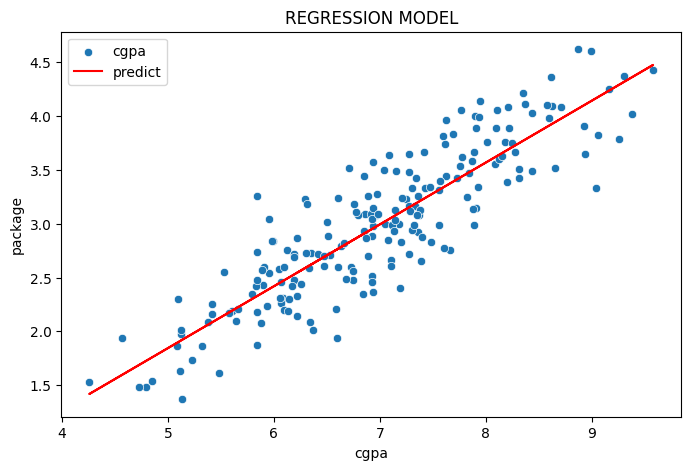

In [44]:
plt.figure(figsize=(8,5))
sns.scatterplot(x="cgpa",y='package',data=ds)
plt.plot(ds['cgpa'],y_pred,c='red')
plt.legend(['cgpa','predict'])
plt.title("REGRESSION MODEL")
plt.savefig("Regression Model.jpg")
plt.show()



RIDGE REGGRESION

In [14]:
from sklearn.linear_model import Ridge, Lasso

In [15]:
ridge_model = Ridge(alpha=0.1)

In [16]:
ridge_model.fit(x_train,y_train)

Ridge(alpha=0.1)

In [17]:
ridge_model.score(x_train,y_train)*100,ridge_model.score(x_test,y_test)*100

(77.58336857272555, 77.31426960761152)

In [18]:
R_pred = ridge_model.predict(x)
R_mse = mean_squared_error(y,R_pred)
R_r2 = r2_score(y,R_pred)
R_mse, R_r2


(0.10689829354103467, 0.7754142683283496)

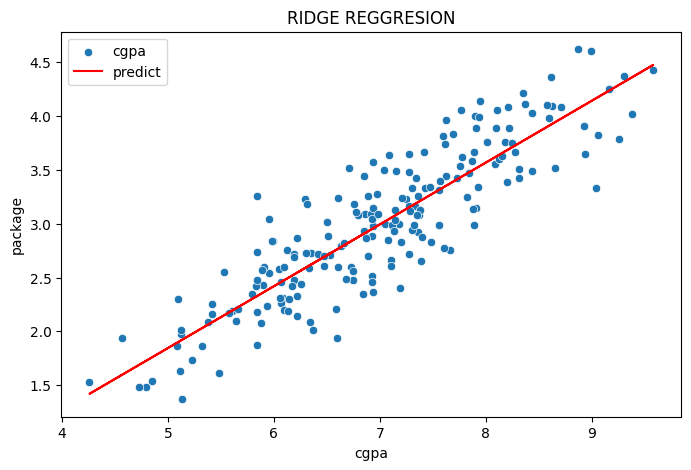

In [19]:
plt.figure(figsize=(8,5))
sns.scatterplot(x="cgpa",y='package',data=ds)
plt.plot(ds['cgpa'],R_pred,c='red')
plt.title("RIDGE REGGRESION")
plt.legend(['cgpa','predict'])
plt.savefig("Regression Model Ridge.jpg")
plt.show()

LASSO

In [20]:
lasso_model = Lasso(alpha=0.1)

In [21]:
lasso_model.fit(x_train,y_train)

Lasso(alpha=0.1)

In [22]:
lasso_model.score(x_train,y_train)*100, lasso_model.score(x_test,y_test)*100

(75.89823831090794, 76.68842835893727)

In [23]:
L_pred = lasso_model.predict(x)


In [24]:
L_mse = mean_squared_error(y,L_pred)
L_r2 = r2_score(y,L_pred)
L_mse, L_r2

(0.11413321858875429, 0.7602142040279037)

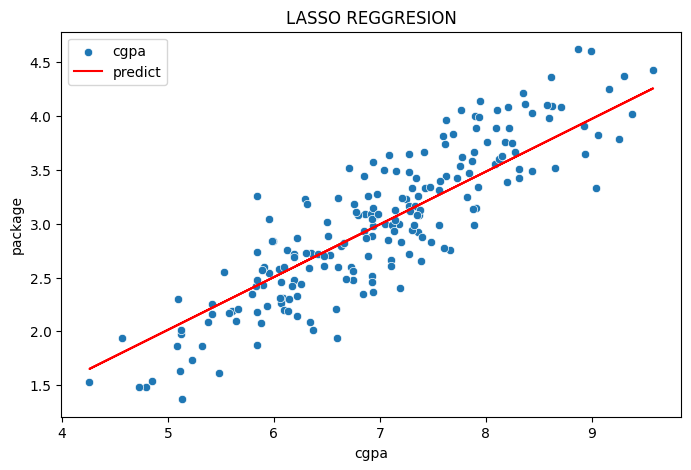

In [25]:
plt.figure(figsize=(8,5))
sns.scatterplot(x="cgpa",y='package',data=ds)
plt.plot(ds['cgpa'],L_pred,c='red')
plt.title("LASSO REGGRESION")
plt.legend(['cgpa','predict'])
plt.savefig("Regression Model Lasso.jpg")
plt.show()

MODEL EVALUATION

1. REGRESSION MODEL

In [48]:
from sklearn.metrics import mean_squared_error, r2_score
y_pred = lr.predict(x)
print("R² Score:", r2_score(y, y_pred))
print("MSE:", mean_squared_error(y, y_pred))


R² Score: 0.775407551304412
MSE: 0.10690149070939998


2. RIDGE MODEL

In [49]:
from sklearn.metrics import mean_squared_error, r2_score
y_pred = ridge_model.predict(x)
print("R² Score:", r2_score(y, y_pred))
print("MSE:", mean_squared_error(y, y_pred))


R² Score: 0.7754142683283496
MSE: 0.10689829354103467


3. LASSO MODEL

In [50]:
from sklearn.metrics import mean_squared_error, r2_score
y_pred = lasso_model.predict(x)
print("R² Score:", r2_score(y, y_pred))
print("MSE:", mean_squared_error(y, y_pred))


R² Score: 0.7602142040279037
MSE: 0.11413321858875429
